In [1]:
# Loading the dataset
import pandas as pd
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import numpy as np
import math
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA
import datetime as dt
from matplotlib import rcParams

In [2]:
data = pd.read_csv('NSE-JUBLFOOD.csv')
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-07,1419.95,1422.7,1394.9,1409.05,1408.80,970102.0,13652.71
1,2018-09-06,1438.00,1451.0,1405.4,1416.20,1416.95,1055786.0,15050.83
2,2018-09-05,1445.00,1461.8,1390.6,1430.00,1432.10,1337839.0,19077.29
3,2018-09-04,1526.00,1526.9,1436.7,1449.65,1448.75,1714015.0,25009.13
4,2018-09-03,1556.70,1558.0,1518.8,1526.30,1526.25,430144.0,6629.42


In [3]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

In [4]:
cols = ['Open', 'High', 'Low', 'Last', 'Total Trade Quantity',
       'Turnover (Lacs)']

In [5]:
data.drop(cols, axis=1, inplace=True)

In [6]:
data = data.sort_values("Date")
data.dtypes

Date      object
Close    float64
dtype: object

In [7]:
data.isnull().sum()

Date     0
Close    0
dtype: int64

In [8]:
data['Date'] = pd.to_datetime(data['Date'])

In [9]:
data.dtypes

Date     datetime64[ns]
Close           float64
dtype: object

In [10]:
data.loc[data['Date']>'2018-06-20','Close'] = data['Close']*2

In [11]:
data.set_index('Date', inplace=True)

In [12]:
data.index

DatetimeIndex(['2015-09-07', '2015-09-08', '2015-09-09', '2015-09-10',
               '2015-09-11', '2015-09-14', '2015-09-15', '2015-09-16',
               '2015-09-18', '2015-09-21',
               ...
               '2018-08-27', '2018-08-28', '2018-08-29', '2018-08-30',
               '2018-08-31', '2018-09-03', '2018-09-04', '2018-09-05',
               '2018-09-06', '2018-09-07'],
              dtype='datetime64[ns]', name='Date', length=744, freq=None)

In [13]:
data.head()

,Close
Date,
2015-09-07,1519.70
2015-09-08,1523.80
2015-09-09,1588.05
2015-09-10,1620.90
2015-09-11,1632.40


In [14]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Close,744.0,1506.152957,606.914504,785.25,1048.95,1280.025,1747.6375,3128.5


In [15]:
rcParams["figure.figsize"]= 15,5

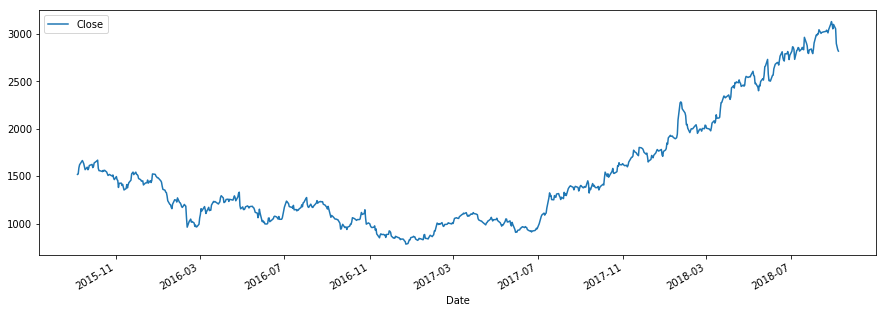

In [16]:
data.plot()

In [17]:
ts = data['Close']

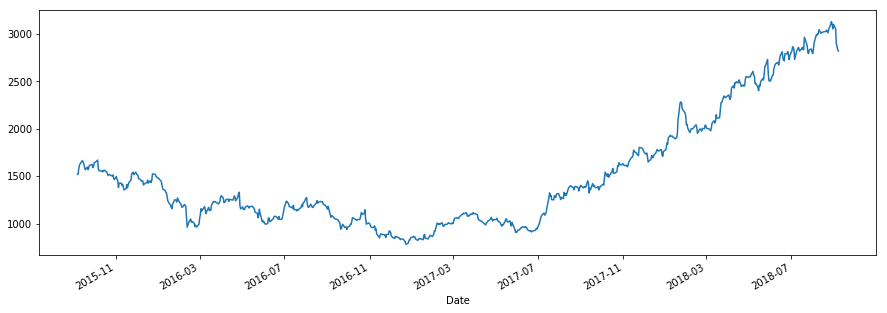

In [18]:
ts.plot()

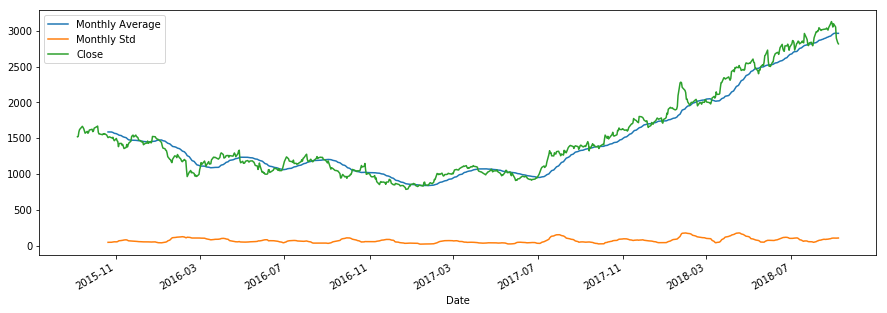

In [19]:
ts.rolling(30).mean().plot(label = 'Monthly Average')
ts.rolling(30).std().plot(label = 'Monthly Std')
ts.plot()
plt.legend()

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose

<Figure size 1080x360 with 0 Axes>

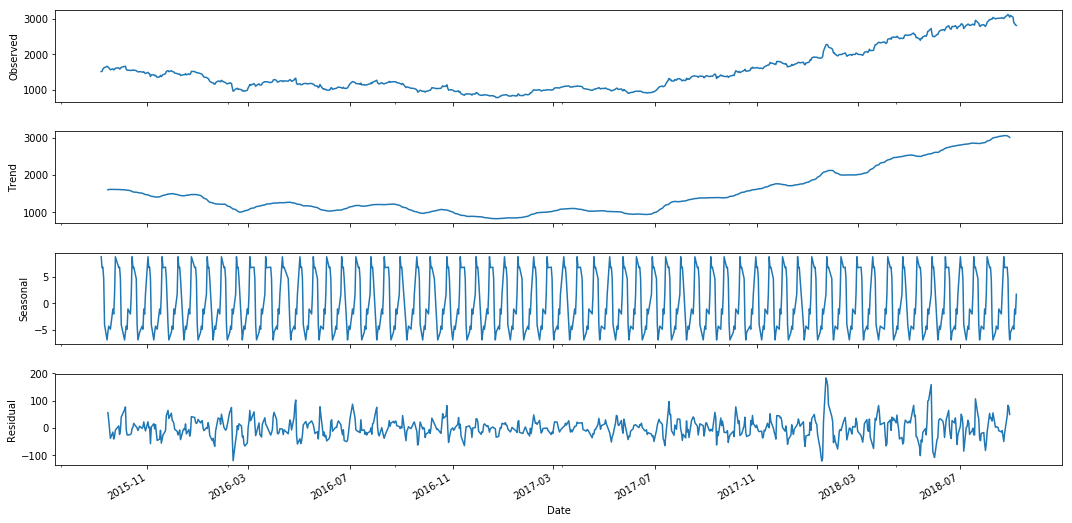

In [23]:
decomp = seasonal_decompose(ts,freq=12)
fig = plt.figure()
fig = decomp.plot()
fig.set_size_inches(15, 8)

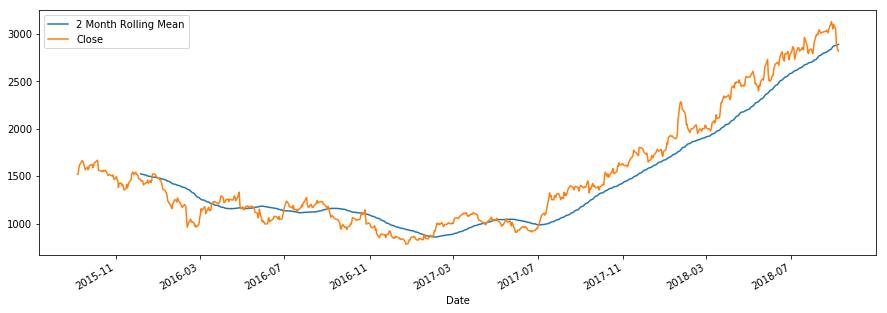

In [25]:
ts.rolling(60).mean().plot(label = '2 Month Rolling Mean')
ts.plot()
plt.legend()

In [26]:
from statsmodels.tsa.stattools import adfuller

In [27]:
result = adfuller(data['Close'])

In [28]:
print('Augmented Dickey-Fuller Test:')
labels = ['ADF Test Statistic',
          'p-value',
          '#Lags Used',
          'Number of Observations Used']

for value,label in zip(result,labels):
    print(label+' : '+str(value) )
    
if result[1] <= 0.05:
    print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
else:
    print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

Augmented Dickey-Fuller Test:
ADF Test Statistic : 0.6019006140798185
p-value : 0.9876623824639483
#Lags Used : 16
Number of Observations Used : 727
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 
